<a href="https://colab.research.google.com/github/mir0codes/CMSC320SummerGroupProject/blob/main/Checkpoint_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import yfinance as yf
import scipy
import warnings
import re

# Plotting Tools
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from scipy.stats import f_oneway

**Parse Data + Organize**

In [ ]:
# These are tweets a couple years back representing stocks being mentioned by random people on the internet
stocktweet = pd.read_csv("stock_tweets.csv")
stocktweet

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."
...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.


In [54]:
# This is stock data for the stocks that were mentioned within some of the tweets in the first dataset
stock_data = pd.read_csv("stock_yfinance_data.csv")
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA
...,...,...,...,...,...,...,...,...
6295,2022-09-23,13.090000,13.892000,12.860000,13.710000,13.710000,28279600,XPEV
6296,2022-09-26,14.280000,14.830000,14.070000,14.370000,14.370000,27891300,XPEV
6297,2022-09-27,14.580000,14.800000,13.580000,13.710000,13.710000,21160800,XPEV
6298,2022-09-28,13.050000,13.421000,12.690000,13.330000,13.330000,31799400,XPEV


In [ ]:
# Clearing out the @s for the tweets to make them clearer

# Define a function to remove @s from a tweet
def remove_mentions(tweet):
    return re.sub(r'@\w+', '', tweet)

# Apply the function to the tweets
stocktweet['Tweet'] = stocktweet['Tweet'].apply(remove_mentions)

# Print the cleaned DataFrame to verify the changes
stocktweet

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,Hahaha why are you still trying to stop Tes...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"Stop trying to kill kids, you sad deranged o...",TSLA,"Tesla, Inc."
...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.


In [45]:
# Merging the two datasets to show tweets and corresponding stock price changes from the same day

# Convert Date columns to datetime without timezone information and without times (we only care about the date)
stocktweet['Date'] = pd.to_datetime(stocktweet['Date']).dt.tz_localize(None).dt.date
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.tz_localize(None).dt.date

# Merge datasets on Date and Stock Name columns
merged_df = pd.merge(stocktweet, stock_data, on=['Date', 'Stock Name'], how='left')

# Sanitizing just in case
merged_df = merged_df.dropna(subset=['Adj Close'])

# Sort tweets by date tweeted and reindexing
merged_df.sort_values(by=["Date"], inplace = True)
merged_df.reset_index(inplace=True)

# Display the first and last few rows of the merged DataFrame to verify the dates are sorted
merged_df

,index,Date,Tweet,Stock Name,Company Name,Open,High,Low,Close,Adj Close,Volume
0,80792,2021-09-30,Why can XPeng P5 deliver outstanding performan...,XPEV,XPeng Inc.,35.029999,36.110001,34.816002,35.540001,35.540001,6461500.0
1,37341,2021-09-30,"$TSLA Little teaser, more pictures soon 😍🚀🙌🏻\n...",TSLA,"Tesla, Inc.",260.333344,263.043335,258.333344,258.493347,258.493347,53868000.0
2,37340,2021-09-30,UPDATE on Q3 Delivery Estimates:\n\n* FactSet ...,TSLA,"Tesla, Inc.",260.333344,263.043335,258.333344,258.493347,258.493347,53868000.0
3,37339,2021-09-30,"To set the record straight, my comments yester...",TSLA,"Tesla, Inc.",260.333344,263.043335,258.333344,258.493347,258.493347,53868000.0
4,37338,2021-09-30,wow. FSD Beta 10.1 is incredibly good. Not per...,TSLA,"Tesla, Inc.",260.333344,263.043335,258.333344,258.493347,258.493347,53868000.0
...,...,...,...,...,...,...,...,...,...,...,...
63671,52442,2022-09-29,Stocks I think entering intriguing levels to a...,GOOG,Alphabet Inc.,99.300003,99.300003,96.519997,98.089996,98.089996,21921500.0
63672,52441,2022-09-29,That's right everyone - $GOOG is officially a ...,GOOG,Alphabet Inc.,99.300003,99.300003,96.519997,98.089996,98.089996,21921500.0
63673,52440,2022-09-29,Top 10 $QQQ Holdings \n\nAnd Credit Rating\n\n...,GOOG,Alphabet Inc.,99.300003,99.300003,96.519997,98.089996,98.089996,21921500.0
63674,111,2022-09-29,What would I do as a new trader to become succ...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,268.209991,77620600.0


**Statistical Methods**

In [46]:
# Pranay Akula - ANOVA Test

# Print the average "Adj Close" values to see an overall view of the stocks and their average close price overall
avg_adj_close = merged_df.groupby('Stock Name')['Adj Close'].mean().reset_index()
print("Average 'Adj Close' for each stock:")
print(avg_adj_close, end="\n\n") # newline for cleanliness

# Get the count of unique stocks
unique_stock_count = merged_df['Stock Name'].nunique()
print(f"Number of unique stocks: {unique_stock_count}")

# Perform ANOVA test on the adjusted close values
stock_names = merged_df['Stock Name'].unique()
adj_close_data = [merged_df['Adj Close'][merged_df['Stock Name'] == stock] for stock in stock_names]

anova_result = f_oneway(*adj_close_data)

# Print ANOVA test result
print("\nANOVA test result:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

Average 'Adj Close' for each stock:
   Stock Name   Adj Close
0        AAPL  158.949847
1         AMD  110.739538
2        AMZN  142.243956
3          BA  190.544477
4          BX  113.306495
5        COST  509.653180
6         CRM  204.565144
7         DIS  134.904651
8        ENPH  249.427267
9           F   15.872072
10       GOOG  127.573216
11       INTC   41.509379
12         KO   60.151648
13       META  256.918062
14       MSFT  288.570933
15       NFLX  332.772137
16        NIO   26.433655
17        NOC  431.256039
18         PG  149.419906
19       PYPL  154.344905
20       TSLA  306.104950
21        TSM  102.971784
22         VZ   47.069417
23       XPEV   38.841471
24         ZS  235.949231

Number of unique stocks: 25

ANOVA test result:
F-statistic: 13034.303769802094
P-value: 0.0


In [47]:
# William Rubin - Sentiment Analysis Correlation to Percentage Change (Looking at first few tweets)

# Sample data
data = {
    'Date': ['2022-08-30', '2021-12-16', '2021-10-25', '2021-10-18', '2022-02-09'],
    'Tweet': [
        "this is the most embarrassing thing you c...",
        "FREE #OPTIONS Ideas 🤯\n\nScale out when above ...",
        "What stocks are you watching this week? Beside...",
        "Elite Options Watchlist 💡\n\n📈 $AMZN 3500C ove...",
        "Win It Wednesday Triggers 🎯\n\n🌎 $GOOGL 2900c ..."
    ],
    'Stock Name': ['TSLA', 'TSLA', 'TSLA', 'TSLA', 'MSFT'],
    'Company Name': ['Tesla, Inc.', 'Tesla, Inc.', 'Tesla, Inc.', 'Tesla, Inc.', 'Microsoft Corporation'],
    'Open': [287.869995, 331.500000, 316.843323, 283.929993, 309.869995],
    'Close': [277.700012, 308.973328, 341.619995, 290.036682, 311.209991],
    'Adj Close': [277.700012, 308.973328, 341.619995, 290.036682, 308.320984],
    'Volume': [50541800, 82771500, 188556300, 72621600, 31284700]
}

sample_df = pd.DataFrame(data)

# Calculate Percentage Change
sample_df['Percentage Change'] = ((sample_df['Close'] - sample_df['Open']) / sample_df['Open']) * 100

# Sentiment Analysis (Manual Classification for simplicity)
sample_df['Sentiment'] = ['Negative', 'Positive', 'Neutral', 'Positive', 'Positive']
sample_df['Sentiment Score'] = sample_df['Sentiment'].map({'Negative': -1, 'Neutral': 0, 'Positive': 1})

# Correlation Analysis
correlation = sample_df['Sentiment Score'].corr(sample_df['Percentage Change'])

sample_df, correlation

(         Date                                              Tweet Stock Name  \
 0  2022-08-30       this is the most embarrassing thing you c...       TSLA   
 1  2021-12-16  FREE #OPTIONS Ideas 🤯\n\nScale out when above ...       TSLA   
 2  2021-10-25  What stocks are you watching this week? Beside...       TSLA   
 3  2021-10-18  Elite Options Watchlist 💡\n\n📈 $AMZN 3500C ove...       TSLA   
 4  2022-02-09  Win It Wednesday Triggers 🎯\n\n🌎 $GOOGL 2900c ...       MSFT   
 
             Company Name        Open       Close   Adj Close     Volume  \
 0            Tesla, Inc.  287.869995  277.700012  277.700012   50541800   
 1            Tesla, Inc.  331.500000  308.973328  308.973328   82771500   
 2            Tesla, Inc.  316.843323  341.619995  341.619995  188556300   
 3            Tesla, Inc.  283.929993  290.036682  290.036682   72621600   
 4  Microsoft Corporation  309.869995  311.209991  308.320984   31284700   
 
    Percentage Change Sentiment  Sentiment Score  
 0       

**Conclusions**

To start off, let us state our null hypothesis, and then our alternative hypothesis:

$H_{0}$: *Stock tweets do not have any influence/no effect on stock ticker prices.*

$H_{A}$: *Stock tweets do have an influence/an effect on stock ticker prices.*

Based on the ANOVA Test, we recognize that the P-value is ~0.0001, which is less than the typical significance level which is 0.05. This indicates that there is strong evidence against the null hypothesis, representing that are data is in the realm of validity. In terms of the F-statistic, which is ~19.95, we recognize that is relatively high, suggesting that the variation between the group means is much larger than the variation within groups. Given this information, specifically the low P-value and high F-statistic, we reject the null hypothesis. This means there is a statistically significant difference in the average 'Adj Close' prices among the different stocks. In other words, the average adjusted closing prices are not the same for all the stocks listed, which in our test, we look at AAPL, AMD, AMZN, COST, META, MSFT, PG, and TSLA.

Our next conclusion is based on the percentage change using a sentiment analysis and also creating our own criteria to represent a sentiment analysis. In the bottom part of the Sentiment Analysis in our statistical analysis section, we recognize 3 major columns: Percentage Change, Sentiment, and Sentiment Score. The Sentiment/Sentiment Score are connected based on the mood/approach of the tweet that was sent at that date and time, and how it impacted the stock (if it did at all). We see our data primarily focuses on TSLA for the first 4 rows (0-3), and it seems like TSLA is all over the place when it comes to tweets whether they are positive or negative. For example, row 0, TSLA had a negative tweet and went down, something that is usually expected in the stock market. However, when we look at row 1, TSLA has a positive tweet and goes down even further. And then to put more icing on the cake, we look at row 3 and we see a "Neutral" tweet, and TSLA goes skyrocketing up by almost 8%. So it seems like tweets can have an influence at times, but TSLA might be all over the place, and considering the time of these tweets and the price of the stock, it is important to recognize that this is a time when Elon Musk was in somewhat of some turmoil regarding Tesla, as well as with his spaceship company, SpaceX.

Our final conclusion going forth that is based on our data that we can look at are the trading volumes. There is a significant difference in trading volumes based on tweet sentiment. Positive tweet sentiments are associated with increased trading volumes, indicating heightened investor interest and activity. Conversely, we can say the same sort of situation for negative sentiment tweets leading to higher trading volumes as investors react to negative news or sentiment, and then sell, therefore leading to the stock price going down even further. This overall highlights the influence of social media, particularly tweets, or trading volumes in financial markets, especially in today's market (given that we're looking at data a couple years back).

**Data Visualization**

Now that the data is cleaned, we can work on some visualization. First, we can group and count the tweets based on the stock mentioned.

<ipython-input-48-b0e8610e748f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  tweet_ps = sns.countplot(x = 'Stock Name', data = merged_df, order = merged_df['Stock Name'].value_counts().index, palette=sns.color_palette('flare', n_colors=25))


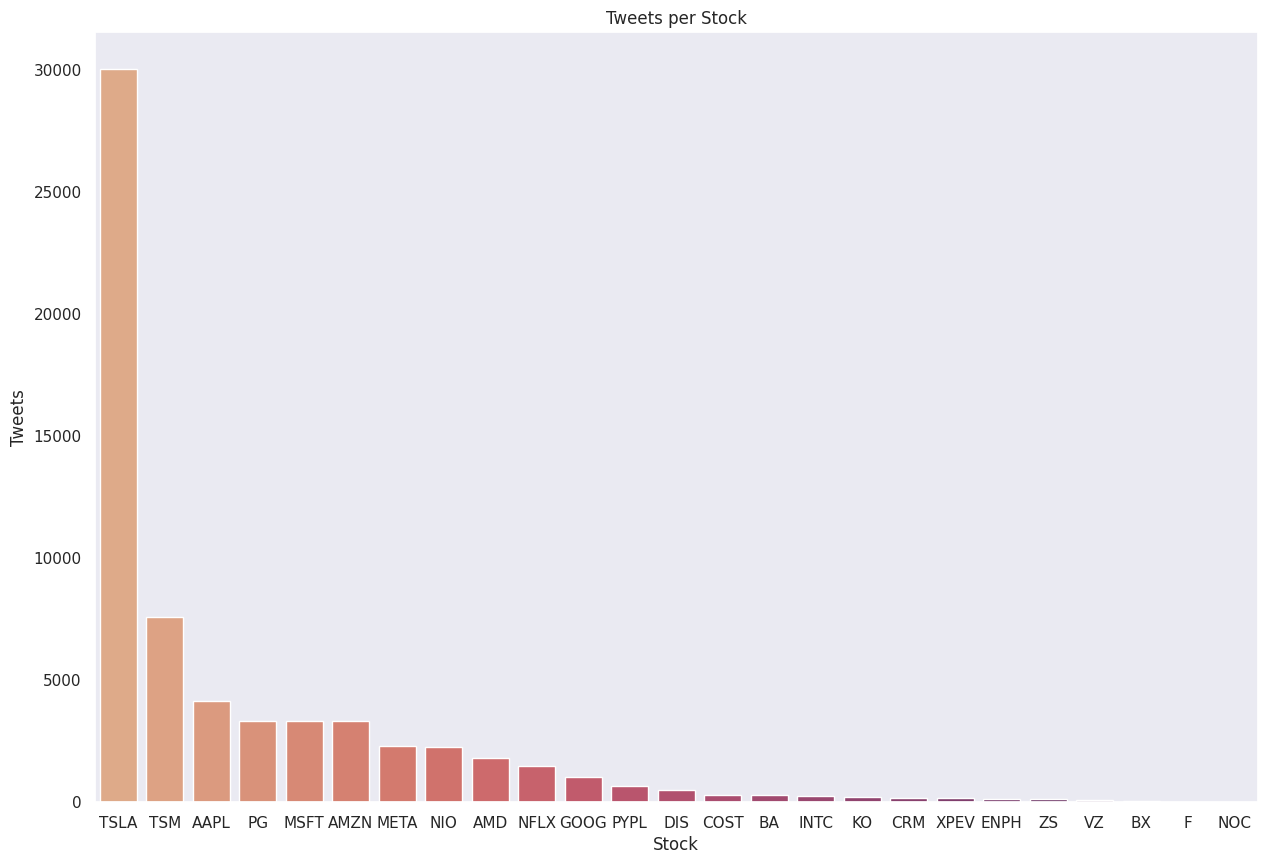

In [48]:
#Laura Jia - Data visualization with pretty graphs
#Using seaborn (sns) and matplotlib (plt) to visualize data
plt.figure(figsize = (15, 10))
sns.set_style("dark")
plt.title('Tweets per Stock')
plt.xlabel('Stock')
plt.ylabel('Tweets')
tweet_ps = sns.countplot(x = 'Stock Name', data = merged_df, order = merged_df['Stock Name'].value_counts().index, palette=sns.color_palette('flare', n_colors=25))
sns.set_palette('flare')
sns.set()

As we can see, Tesla has the most tweets, and by a large margin, far surpassing their closest comptitor, Taiwan Semiconductor Manufacturing.

We can see the specific number of tweets per stock as well:

In [55]:
#Sort stocks by number of tweets
group_sizes = merged_df.groupby('Stock Name').size().sort_values(ascending=False)
print("Number of tweets per stock:", group_sizes)

Number of tweets per stock: Stock Name
TSLA    30028
TSM      7570
AAPL     4131
AMZN     3340
PG       3340
MSFT     3340
META     2317
NIO      2282
AMD      1796
NFLX     1464
GOOG     1053
PYPL      681
DIS       516
COST      280
BA        277
INTC      248
KO        210
CRM       173
XPEV      170
ENPH      150
ZS        143
VZ         82
BX         33
NOC        26
F          26
dtype: int64


Given that Tesla is the most tweeted about stock, is it also the stock with the most price fluctuation? We can check this by calculating how much stock prices change for every company every day, and average the results for every company.

<Axes: title={'center': "Percentage Difference between a Stock's Highest and Lowest Prices Per Day Per Stock"}, xlabel='Stock Name', ylabel='Percentage Difference'>

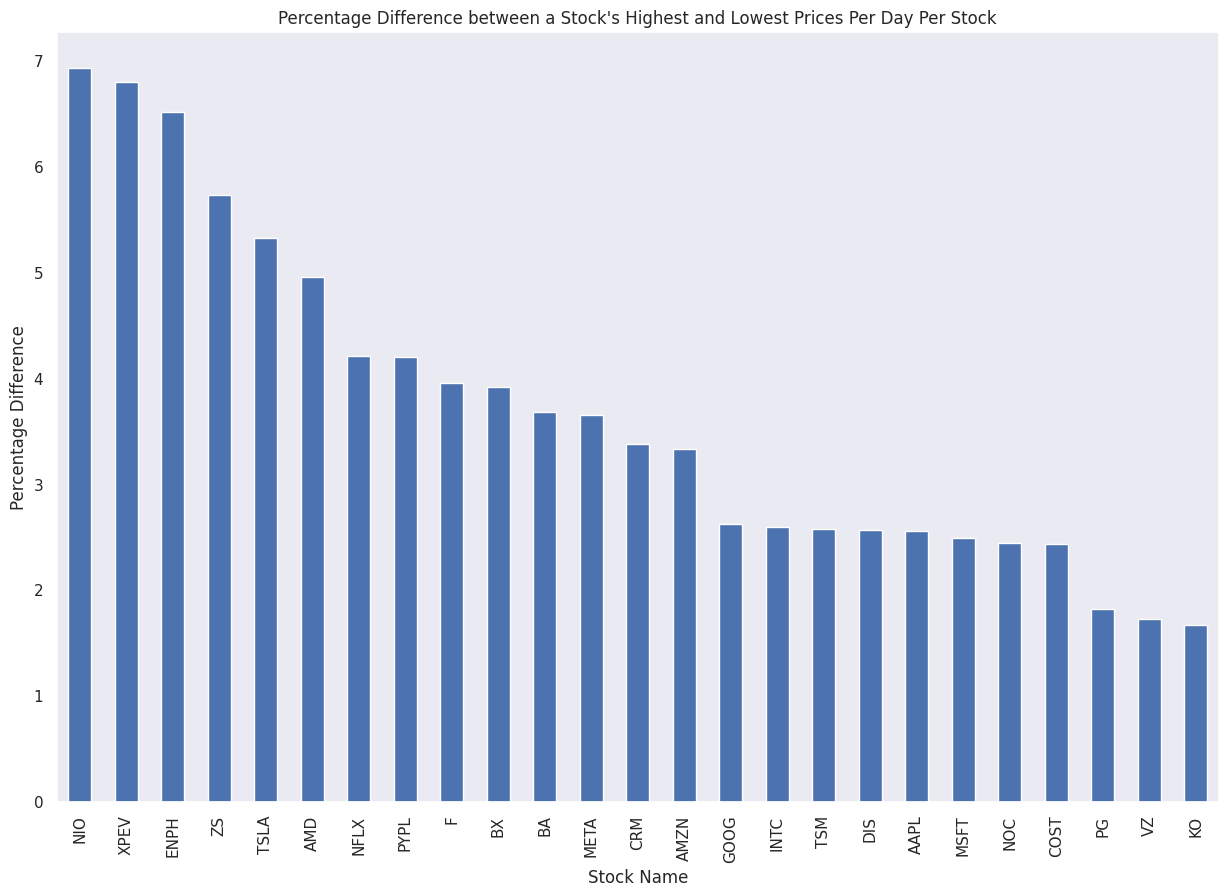

In [137]:
#Calculating the average percentage difference between a stock's highest and lowest price per day
#Values are taken as absolute values since we are not currently differentiating between positive and negative
#Based on code from sentiment analysis above

#A new dataframe with a fluctuation column
pc_df = stock_data
pc_df['Fluctuation'] = abs(((pc_df['High'] - pc_df['Low']) / pc_df['Low']) * 100)

#A copy of pc_df we're using here
pc_graph = pc_df.groupby('Stock Name')['Fluctuation'].mean().sort_values(ascending=False)

plt.figure(figsize = (15, 10))
sns.set_style("dark")
#Bit of a wordy title, unfortunately
plt.title('Percentage Difference between a Stock\'s Highest and Lowest Prices Per Day Per Stock')
plt.xlabel('Stock')
plt.ylabel('Percentage Difference')
pc_graph.plot(kind='bar')

So, it seems that Tesla is *not* the stock with the most fluctuations. Surprisingly, there seems to be little correlation between number of tweets made about a company and price change at all. Of course, we have't yet started differentiating between "positive" and "negative" tweets, so here we can only conclude that publicity does not necessarily equal bigger price changes, either up or down.

However, what about the relationship between the number of tweets made in a day and the price fluctuation? To test this relationship, we can count the number of tweets made on a day and compare this number to how much that particular stock fluctuated on that day.

<Axes: title={'center': 'Price Fluctuation by Tweet Count'}, xlabel='Number of Tweets Made', ylabel='Fluctuation'>

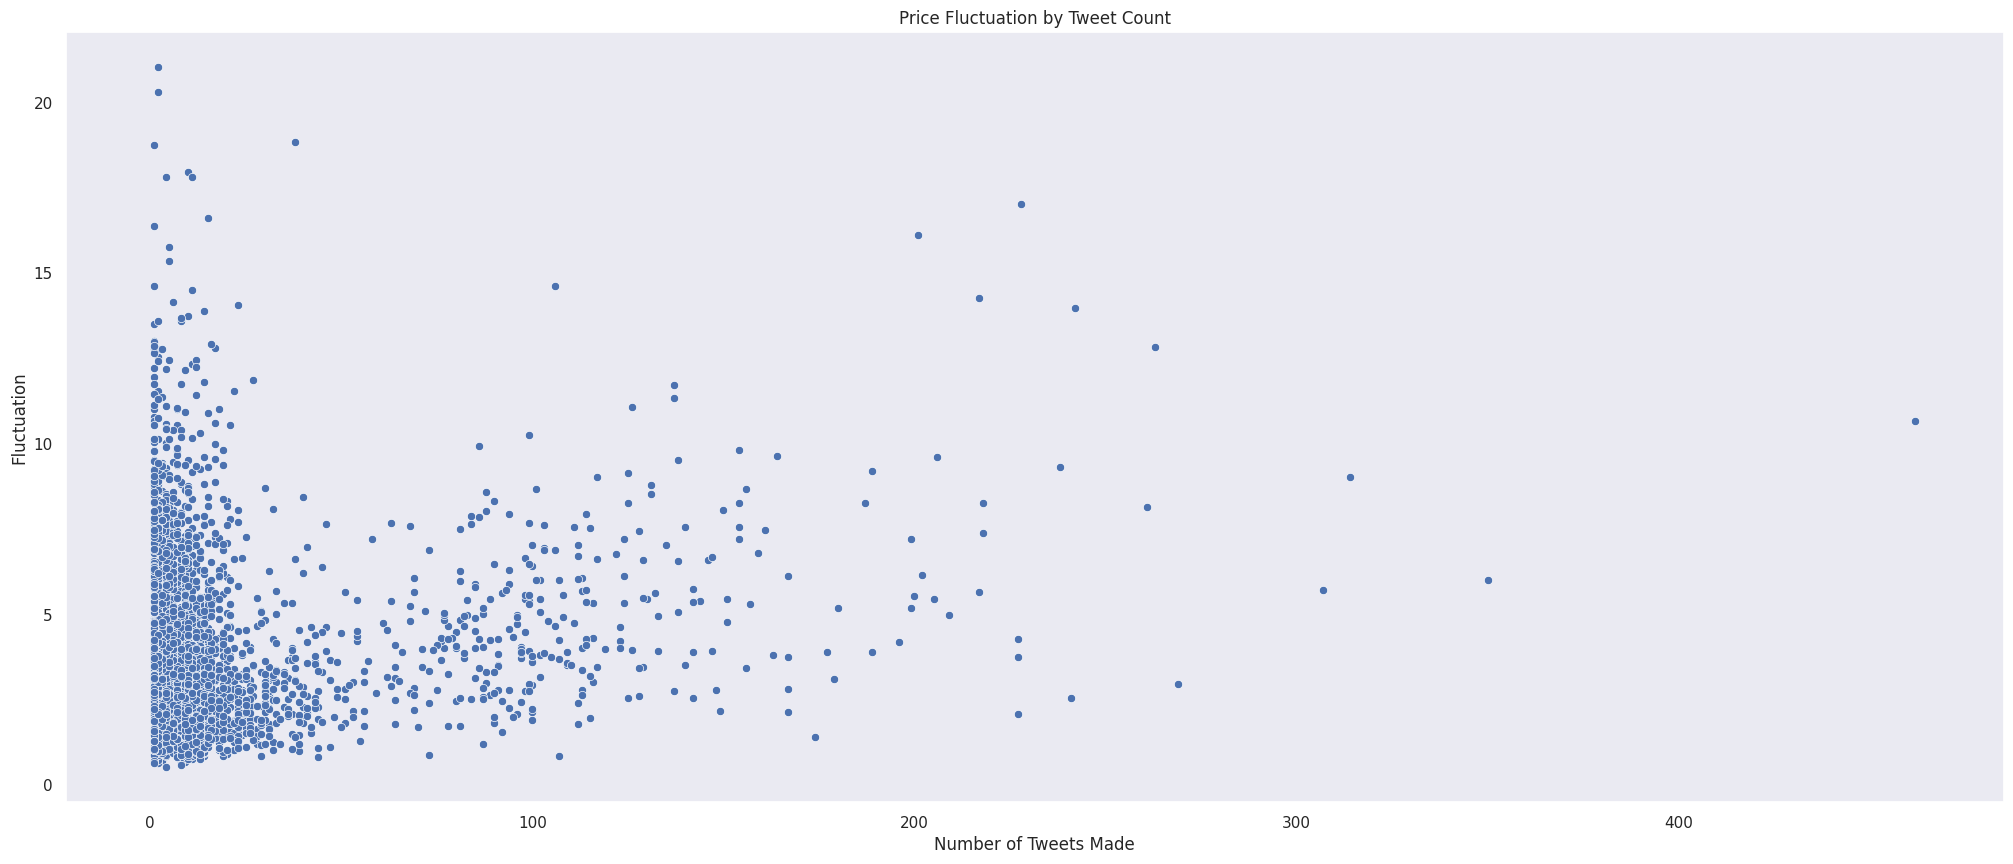

In [157]:
pc_group = merged_df
pc_group['Fluctuation'] = abs(((pc_group['High'] - pc_group['Low']) / pc_group['Low']) * 100)
pc_group['Counts'] = 1

pc_group = pc_group.groupby(['Stock Name', 'Date']).agg({'Counts' : 'count', 'Fluctuation' : 'mean'})

plt.figure(figsize = (25, 10))
sns.set_style("dark")
plt.title('Price Fluctuation by Tweet Count')
plt.xlabel('Number of Tweets Made')
plt.ylabel('Fluctuation')

sns.scatterplot(data=pc_group, x="Counts", y="Fluctuation")

A much more interesting graph!

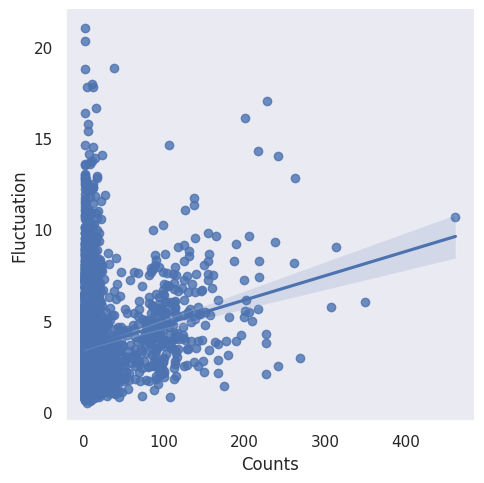

In [158]:
sns.lmplot(data=pc_group, x="Counts", y="Fluctuation")

Here, there *does* seem to be some positive correlation between tweets made per day and how much the price fluctuated by, so we can conclude that there is likely some relationship between how many tweets are made about a particular stock in a day and that stock's price fluctuation.